### **Project Introduction**

In this project, we aim to analyze the inventory of this existing store  with the goal of determining ways to maximize profit margins in a new subsidiary (optomized) store aimed at high profit sales. This is commonly called a **Focused Differentiation Strategy**. (We will not address overhead issues in this project as we do not have this data. Overhead would need to be subtracted from total profit in a real world setting.) This project focuses on the viability of a smaller but more profit centered additional location and/ or markerting directive. 

The data is derived from the [Superstore Sales Dataset](https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales). The dataset includes sales, profit, and inventory data providing a comprehensive view of sales performance across various regions, product categories, and customer segments.

#### Project Objectives:

1. Identifying the top-selling and most profitable products.
2. Analyzing products with low or negative profit margins to consider for removal.
3. Evaluating the impact of discounts on profit margins and sales.
4. Recommending an optimized product mix for the new store, focusing on high-profit-margin items.
5. Using predictive modeling to forecast the future performance of the new store based on the proposed changes.

#### Key Analysis Techniques:
- **Profit Margin Analysis**: We will calculate the profit margin for each product category and individual products to identify top performers.
- **Predictive Modeling**: A predictive model will be used to estimate the future sales and profits for the new store based on the optimized product mix.

#### Libraries Needed:
To perform the analysis, we will use the following Python libraries:
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical operations.
- **matplotlib** and **seaborn**: For data visualization.
- **scikit-learn**: For predictive modeling and clustering.
- **statsmodels**: For statistical analysis and modeling.

This project will provide actionable insights to optimize inventory decisions and maximize profitability in the new store, building on the sales data and performance of the existing store.


#### **Initial Data Inspection and Summary Statistics**

In this initial step, I begin by importing the necessary libraries, including `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, and `statsmodels` for data manipulation, analysis, and visualization. The dataset, imported from [Kaggle](https://www.kaggle.com/datasets/ishanshrivastava28/superstore-sales), is loaded from my Desktop into a DataFrame. After loading the dataset, we inspect the first few rows using the `head()` function to get a preview of the dataset's structure and values. This is followed by generating summary statistics for the dataset using the `describe()` function, which provides key metrics such as mean, standard deviation, and percentiles for the numerical columns. We also check for any missing values in the dataset using the `isnull().sum()` function, which returns the count of missing values for each column. Finally, the data types of each column are inspected using the `dtypes` attribute, and necessary conversions (e.g., date and categorical columns) are made to ensure that the data types are appropriate for further analysis.

### Synopsis of the Output:
- **Head of the Data**: The first five rows reveal various attributes of the dataset, including `Order ID`, `Order Date`, `Ship Mode`, customer information, location details, product categories, sales, discounts, and profits.
- **Summary Statistics**: The dataset contains 9,994 records. The statistics show the average sales value is $229.86 with a maximum sale of $22,638.48. The dataset also provides insights into quantities, discounts, and profits, where the average profit is $28.66, but some records show negative profits (up to -$6,599.98).
- **Missing Values**: No missing values are present in the dataset.
- **Data Types**: Columns such as `Order Date` and `Ship Date` have been converted to datetime format, while categorical columns such as `Ship Mode`, `Region`, and `Category` have been converted to the correct type for analysis. Other columns, such as `Sales` and `Profit`, are properly categorized as numerical data types.


In [174]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import statsmodels.api as sm

# Load the dataset (ensure the file name and path are correct)
data = pd.read_csv('/Users/steventuschman/Desktop/Superstore.csv')

# Inspect the first few rows
print(data.head())

# Summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Check data types (no parentheses needed for dtypes)
print(data.dtypes)


   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

### **Initial Analysis of Dataset Profitability**

In this initial analysis, we calculated key financial metrics for the existing store, which serve as a benchmark for evaluating the impact of discounts and other factors on overall profitability.

#### Key Metrics:
- **Total Sales**: $2,297,200.86
- **Total Profit**: $286,397.02
- **Overall Profit Margin**: 12.47%

#### Industry Context:
For the **electronics and appliance industry**, profit margins vary, but generally fall within certain ranges:
- **Consumer Electronics**: Margins are typically lower due to high competition and product costs, usually around **5-10%**.
- **Home Appliances**: Margins are somewhat higher, often ranging from **10-15%**, with premium products sometimes reaching the higher end of this range.

#### Interpretation:
The **12.47%** profit margin calculated for the existing store places it on the higher end of typical industry benchmarks. This suggests that the store is performing well in terms of profitability, particularly if it deals with electronics or appliances where margins tend to be tighter.

This profitability benchmark provides important context for evaluating the impact of future decisions, such as discount strategies, on both sales and profit margins.


In [175]:
# Calculate total sales and total profit for the entire dataset
total_sales = data['Sales'].sum()
total_profit = data['Profit'].sum()

# Calculate overall profit margin
profit_margin = (total_profit / total_sales) * 100

# Print the results
print(f"Total Sales: ${total_sales:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Overall Profit Margin: {profit_margin:.2f}%")


Total Sales: $2,297,200.86
Total Profit: $286,397.02
Overall Profit Margin: 12.47%


#### **Converting Object Columns to Categorical and Verifying Data Types**

In this step, we identify columns in the dataset that are stored as `object` types but should be treated as categorical variables. Columns such as `Ship Mode`, `Segment`, `Country`, `City`, `State`, `Region`, `Category`, and `Sub-Category` are examples of variables that represent distinct categories and can be optimized by converting them to the `category` data type. This conversion helps improve memory usage and the efficiency of operations like grouping and aggregation.

After conversion, we verify the data types to ensure the columns are properly categorized. Here is the output after the conversion:

### Output:
- **Ship Mode**, **Segment**, **Country**, **City**, **State**, **Region**, **Category**, and **Sub-Category** have been successfully converted to `category` type.
- Other columns like `Order ID`, `Customer ID`, and `Product Name` remain as `object` types, as they represent unique string identifiers or descriptions.
- Numerical columns like **Sales**, **Quantity**, **Discount**, and **Profit** retain their appropriate types (`int64` or `float64`).

This optimization ensures that our dataset is efficiently structured for further analysis.


In [176]:
# Convert relevant columns to 'category' type
categorical_columns = ['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region', 'Category', 'Sub-Category']
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Verify the changes
print(data.dtypes)


Row ID              int64
Order ID           object
Order Date         object
Ship Date          object
Ship Mode        category
Customer ID        object
Customer Name      object
Segment          category
Country          category
City             category
State            category
Postal Code         int64
Region           category
Product ID         object
Category         category
Sub-Category     category
Product Name       object
Sales             float64
Quantity            int64
Discount          float64
Profit            float64
dtype: object


In [177]:
# Determine the number of unique products
unique_products_count = data['Product Name'].nunique()

# Print the result
print(f"Total number of unique products: {unique_products_count}")


Total number of unique products: 1841


In [178]:
import os

# Define environment variables for file paths (for flexibility across environments)
sales_csv_path = os.getenv('SALES_CSV_PATH', 'sorted_by_average_sales.csv')
profit_csv_path = os.getenv('PROFIT_CSV_PATH', 'sorted_by_average_profit.csv')

# Group by Product Name and calculate the average sales and profit for each product
product_sales_profit = data.groupby('Product Name').agg({
    'Sales': 'mean',  # Average sales per product
    'Profit': 'mean'  # Average profit per product
}).rename(columns={'Sales': 'Average Sales', 'Profit': 'Average Profit'})

# Sort by average sales in descending order
sorted_by_sales = product_sales_profit.sort_values(by='Average Sales', ascending=False)

# Sort by average profit in descending order
sorted_by_profit = product_sales_profit.sort_values(by='Average Profit', ascending=False)

# Check the number of unique products in both lists
sales_count = len(sorted_by_sales)
profit_count = len(sorted_by_profit)

# Print row count for each list
print(f"Total number of products based on sales: {sales_count}")
print(f"Total number of products based on profit: {profit_count}")

# Ensure both counts are 1841
if sales_count == 1841 and profit_count == 1841:
    print("Both lists contain 1841 products. No issues detected.")
else:
    print("There is a mismatch in the number of products.")

# Print top 5 and bottom 5 for sales
print("\nTop 5 Products by Average Sales:")
print(sorted_by_sales.head(5))
print("\nBottom 5 Products by Average Sales:")
print(sorted_by_sales.tail(5))

# Print top 5 and bottom 5 for profit
print("\nTop 5 Products by Average Profit:")
print(sorted_by_profit.head(5))
print("\nBottom 5 Products by Average Profit:")
print(sorted_by_profit.tail(5))

# Save the data with corrected labels to CSV files
sorted_by_sales.to_csv(sales_csv_path, index=True)
sorted_by_profit.to_csv(profit_csv_path, index=True)

print(f"Data saved successfully as '{sales_csv_path}' and '{profit_csv_path}' with updated labels.")


Total number of products based on sales: 1841
Total number of products based on profit: 1841
Both lists contain 1841 products. No issues detected.

Top 5 Products by Average Sales:
                                                    Average Sales  \
Product Name                                                        
Cisco TelePresence System EX90 Videoconferencin...     22638.4800   
Canon imageCLASS 2200 Advanced Copier                  12319.9648   
Cubify CubeX 3D Printer Triple Head Print               7999.9800   
3D Systems Cube Printer, 2nd Generation, Magenta        7149.9450   
HP Designjet T520 Inkjet Large Format Printer -...      6124.9650   

                                                    Average Profit  
Product Name                                                        
Cisco TelePresence System EX90 Videoconferencin...      -1811.0784  
Canon imageCLASS 2200 Advanced Copier                    5039.9856  
Cubify CubeX 3D Printer Triple Head Print               -38

In [179]:
# Rename columns for clarity to 'Average Sales' and 'Average Profit'
product_sales_profit = product_sales_profit.rename(columns={'Sales': 'Average Sales', 'Profit': 'Average Profit'})

# Sort by average sales in descending order
sorted_by_sales_df = product_sales_profit.sort_values(by='Average Sales', ascending=False)

# Sort by average profit in descending order
sorted_by_profit_df = product_sales_profit.sort_values(by='Average Profit', ascending=False)

# Save DataFrames to CSV files with updated labels
sorted_by_sales_df.to_csv('sorted_by_average_sales.csv', index=True)
sorted_by_profit_df.to_csv('sorted_by_average_profit.csv', index=True)

print("Data saved successfully with updated labels: 'Average Sales' and 'Average Profit'.")


Data saved successfully with updated labels: 'Average Sales' and 'Average Profit'.


####  **Evaluating the Impact of Discounts on Profit Margins and Sales**

In this step, we explored the relationship between discounts, sales, and profit margins, focusing on whether higher discounts lead to increased sales and how they affect profitability.

#### Calculations Used:
1. **Profit Margin Calculation**:
   - We calculated the **Profit Margin** for each product using the formula:
   \[
   \text{Profit Margin} = \left( \frac{\text{Profit}}{\text{Sales}} \right) \times 100
   \]
   - This gives the percentage of profit relative to sales, showing how much profit is made for every dollar of sales.

2. **Correlation Between Discounts and Profit Margin**:
   - To analyze the relationship between **Discount** and **Profit Margin**, we calculated the **correlation coefficient** using the formula for Pearson correlation. This value tells us how strongly discounts are related to changes in profit margins.
   - A **negative correlation coefficient** indicates that as discounts increase, profit margins tend to decrease. In this case, the correlation was **-0.8645**, a strong negative relationship.

3. **Top Discounted Products**:
   - We grouped products by **Product Name** and calculated the **average discount**, **average sales**, and **average profit margin** for each product.
   - The top 10 products with the highest discounts were identified by sorting products by **average discount percentage** in descending order.

4. **Average Sales and Profit Margins for High-Discount Products**:
   - For these top-discounted products, we calculated the **average sales** and **average profit margin** across the products. This helps us understand the overall effect of discounts on sales and profitability.

#### Key Findings:
1. **Correlation between Discount and Profit Margin**:
   - The correlation is **-0.8645**, indicating a **strong negative relationship**. As discounts increase, profit margins tend to decrease significantly, meaning higher discounts are damaging profitability.

2. **Top 10 Products by Discount Percentage**:
   - The products with the highest discounts (up to 80%) all have **negative profit margins**, with some as low as **-275%**. This shows that heavy discounting is having a severely negative impact on profitability.

3. **Sales and Profit Margins for Top Discount Products**:
   - Despite high discounts, the **average sales** for these top-discount products is relatively low at **$224.57**.
   - The **average profit margin** for these products is **-126.39%**, meaning these discounts are not driving significant sales but are substantially reducing profitability.

#### Conclusions:
- High discounts are not leading to proportionately high sales and are resulting in **deep negative profit margins**.
- There is a need to reconsider the discount strategy for products receiving high discounts, as it is severely impacting profitability.




In [180]:
# Step 1: Calculate the profit margin for each product
data['Profit Margin'] = (data['Profit'] / data['Sales']) * 100

# Step 2: Analyze the correlation between discount and profit margin
correlation = data['Discount'].corr(data['Profit Margin'])
print(f"Correlation between Discount and Profit Margin: {correlation:.4f}")

# Step 3: Identify top products by discount percentage
# Group by Product Name and calculate the average discount, sales, and profit margin for each product
product_discount_analysis = data.groupby('Product Name').agg({
    'Discount': 'mean',
    'Sales': 'mean',
    'Profit Margin': 'mean'
}).sort_values(by='Discount', ascending=False)

# Step 4: Display the top 10 products by highest discount percentage
print("\nTop 10 Products by Discount Percentage:")
print(product_discount_analysis.head(10))

# Step 5: Evaluate sales and profit margins for the top products
top_discount_products = product_discount_analysis.head(10)
print("\nSales and Profit Margins for Top Discount Products:")
print(top_discount_products[['Sales', 'Profit Margin']])

# Step 6: Determine if discounts helped boost sales or hurt profit margins
# Print overall statistics for high-discount products
high_discount_sales_avg = top_discount_products['Sales'].mean()
high_discount_profit_margin_avg = top_discount_products['Profit Margin'].mean()

print(f"\nAverage Sales for High-Discount Products: ${high_discount_sales_avg:,.2f}")
print(f"Average Profit Margin for High-Discount Products: {high_discount_profit_margin_avg:.2f}%")


Correlation between Discount and Profit Margin: -0.8645

Top 10 Products by Discount Percentage:
                                                    Discount     Sales  \
Product Name                                                             
Eureka Disposable Bags for Sanitaire Vibra Groo...  0.800000    1.6240   
GBC Plasticlear Binding Covers                      0.728571    9.8400   
GBC VeloBinder Electric Binding Machine             0.725000  124.0045   
Zebra GK420t Direct Thermal/Thermal Transfer Pr...  0.700000  703.7100   
Brother MFC-9340CDW LED All-In-One Printer, Cop...  0.700000  341.9910   
Epson Perfection V600 Photo Scanner                 0.700000  206.9910   
Lexmark MarkNet N8150 Wireless Print Server         0.700000  361.7550   
Bush Westfield Collection Bookcases, Dark Cherr...  0.700000   90.8820   
Okidata B401 Printer                                0.700000  179.9910   
Cisco 8961 IP Phone Charcoal                        0.700000  224.9370   

              

#### **Saving Top Discount Product Data to CSV**

In this step, we save the data for the **top discounted products** to a CSV file for future analysis. This includes the products with the highest discount percentages, their corresponding sales, and their profit margins. By storing this data, we can easily reload it later for deeper analysis or reporting purposes.

```python
# Save the top discount product data to a CSV file
top_discount_products.to_csv('top_discount_products.csv', index=True)

print("Data for top discount products saved successfully as 'top_discount_products.csv'.")


In [181]:
# Save the top discount product data to a CSV file
top_discount_products.to_csv('top_discount_products.csv', index=True)

print("Data for top discount products saved successfully as 'top_discount_products.csv'.")


Data for top discount products saved successfully as 'top_discount_products.csv'.


#### **Discount Analysis: Percentage of Items and Sales Affected by Discounts**

In this step, we calculated the percentage of products receiving discounts and the total percentage of sales that these discounted items make up.

#### Calculations:
1. **Percentage of Items Receiving Discounts**:
   - We counted the number of unique products that received any discount (where `Discount > 0`) and calculated the percentage relative to the total number of products.
   - Formula: 
     \[
     \text{Percentage of Items with Discounts} = \left( \frac{\text{Number of Items with Discounts}}{\text{Total Number of Items}} \right) \times 100
     \]

2. **Percentage of Total Sales from Discounted Items**:
   - We summed the total sales from products that received discounts and calculated the percentage of these sales relative to the total sales.
   - Formula: 
     \[
     \text{Percentage of Sales from Discounted Items} = \left( \frac{\text{Total Sales from Discounted Items}}{\text{Total Sales}} \right) \times 100
     \]

#### Results:
- **Percentage of Items Receiving Discounts**: **89.52%**
   - Nearly 90% of the store's products are being discounted, indicating a heavy reliance on discounts.
   
- **Percentage of Total Sales from Discounted Items**: **52.64%**
   - Over half of the total sales come from discounted products, but it does not represent the full majority, suggesting that discounts are not the sole driver of sales.

#### Interpretation:
- **Heavy Discounting Strategy**: With 89.52% of the products receiving discounts, the store is applying discounts broadly across its inventory. However, only 52.64% of sales come from these discounted items, which implies that discounts may not be as effective in driving sales for all products.
- **Potential for Optimizing Discounts**: Given that discounts are applied to almost all products but are generating only half of the total sales, there may be room to optimize the discount strategy. Focusing discounts on specific products or categories that respond well to them


In [182]:
# Step 1: Percentage of items receiving discounts
# Count the number of products with a discount greater than 0
items_with_discounts = data[data['Discount'] > 0]['Product Name'].nunique()

# Total number of unique products
total_items = data['Product Name'].nunique()

# Calculate the percentage of items with discounts
percent_items_with_discounts = (items_with_discounts / total_items) * 100

# Step 2: Percentage of total sales from discounted items
# Calculate the total sales from discounted items
sales_from_discounted_items = data[data['Discount'] > 0]['Sales'].sum()

# Total sales from all items
total_sales = data['Sales'].sum()

# Calculate the percentage of sales from discounted items
percent_sales_from_discounts = (sales_from_discounted_items / total_sales) * 100

# Print the results
print(f"Percentage of items receiving discounts: {percent_items_with_discounts:.2f}%")
print(f"Percentage of total sales from discounted items: {percent_sales_from_discounts:.2f}%")


Percentage of items receiving discounts: 89.52%
Percentage of total sales from discounted items: 52.64%


#### **Analysis of Non-Discounted Items: Sales and Profitability**

In this step, we evaluated the performance of products that did not receive any discounts. The analysis focused on understanding how non-discounted items contribute to overall sales and profitability.

#### Key Findings:
1. **Total Sales from Non-Discounted Items**: Non-discounted items accounted for a substantial portion of the total sales, contributing nearly half of the store's overall revenue.
   
2. **Average Profit Margin**: Non-discounted products displayed an exceptionally high average profit margin of 199%, significantly higher than the profit margins for discounted items.

3. **Top-Performing Products**: The top non-discounted products are high-value items with healthy sales figures and profit margins. Many of these products had profit margins between 26% and 50%, making them key contributors to profitability without requiring discounts.

#### Interpretation:
- **Profitability of Non-Discounted Items**: These items are highly profitable, suggesting that a discounting strategy may not be necessary for all products, especially those that perform well without any price reductions.
- **Optimizing Discount Strategies**: This analysis suggests an opportunity to further optimize pricing by maintaining full prices on these high-margin products to enhance overall profitability.


In [183]:
# Step 1: Filter the products that did not receive any discount (Discount == 0)
non_discounted_items = data[data['Discount'] == 0]

# Step 2: Group the non-discounted items by 'Product Name' and calculate total sales and profit margin
non_discounted_analysis = non_discounted_items.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean'  # Calculating average profit margin
}).sort_values(by='Sales', ascending=False)

# Step 3: Calculate the total sales and average profit margin for non-discounted items
total_non_discounted_sales = non_discounted_analysis['Sales'].sum()
average_non_discounted_profit_margin = non_discounted_analysis['Profit'].mean()

# Step 4: Print the summary of non-discounted items
print(f"Total Sales for Non-Discounted Items: ${total_non_discounted_sales:,.2f}")
print(f"Average Profit Margin for Non-Discounted Items: {average_non_discounted_profit_margin:.2f}%")

# Step 5: Print top 10 non-discounted products by sales
print("\nTop 10 Non-Discounted Products by Sales:")
print(non_discounted_analysis.head(10))


Total Sales for Non-Discounted Items: $1,087,908.47
Average Profit Margin for Non-Discounted Items: 199.00%

Top 10 Non-Discounted Products by Sales:
                                                       Sales      Profit  \
Product Name                                                               
Canon imageCLASS 2200 Advanced Copier               41999.88  20159.9424   
HP Designjet T520 Inkjet Large Format Printer -...  15749.91   5039.9712   
3D Systems Cube Printer, 2nd Generation, Magenta    14299.89   3717.9714   
Fellowes PB500 Electric Punch Plastic Comb Bind...  13980.89   6990.4450   
High Speed Automatic Electric Letter Opener         13100.24    524.0096   
Martin Yale Chadless Opener Electric Letter Opener   9993.72    199.8744   
GBC Ibimaster 500 Manual ProClick Binding System     9892.74   4946.3700   
Ibico EPK-21 Electric Binding System                 9449.95   4630.4755   
Tennsco 6- and 18-Compartment Lockers                9015.78   1622.8404   
GBC DocuBind T

#### **Saving Non-Discounted Product Analysis to CSV**

In this step, the analysis of **non-discounted products** was saved to a CSV file. This file contains detailed information on total sales, profit, and profit margins for each non-discounted product, making it easy to reload the data for further analysis or reporting.

The file **`non_discounted_products.csv`** has been successfully created, providing a convenient reference for future exploration of non-discounted product performance.


In [184]:
# Save the non-discounted product analysis to a CSV file
non_discounted_analysis.to_csv('non_discounted_products.csv', index=True)

print("Non-discounted product analysis saved successfully as 'non_discounted_products.csv'.")


Non-discounted product analysis saved successfully as 'non_discounted_products.csv'.


#### **Optimized Product Mix: High-Profit-Margin Items**

In this step, we curated an optimized product mix for the new store by focusing on products that contribute the highest profit margins. This analysis includes:
1. **All Non-Discounted Items**: As non-discounted items are already proven to be highly profitable, they are included in the product mix.
2. **Elimination of Low-Profit Items**: Any product with a profit margin of less than 0 was excluded from the analysis.

### Optimized Product Mix Summary:
- The top 10 products based on **profit margin** all exhibit profit margins of **50%**, indicating strong profitability without the need for discounts.
- These products include high-value office supplies and equipment that consistently generate profits.

### Key Metrics:
- **Total Sales for Optimized Product Mix**: **$1,087,908.47**
   - This represents the total sales generated from the products included in the optimized mix.
   
- **Total Profit for Optimized Product Mix**: **$320,987.60**
   - This is the cumulative profit generated from the selected products.

- **Average Profit Margin for Optimized Product Mix**: **199.00%**
   - The high average profit margin indicates that the optimized product mix consists of highly profitable items, making it an ideal selection for maximizing profitability in the new store.


By focusing on non-discounted items and eliminating products with negative profit margins, this optimized product mix provides a foundation for higher profitability. This strategy ensures that the new store will focus on selling products that have proven to generate strong returns without the need for discounts.

### Comparison: Initial Store vs. Optimized Product Mix

| Metric                             | Initial Store           | Optimized Product Mix     | Difference                                  |
|------------------------------------|-------------------------|---------------------------|---------------------------------------------|
| **Total Sales**                    | $2,297,200.86           | $1,087,908.47             | -$1,209,292.39 (Reduced by ~52.6%)          |
| **Total Profit**                   | $286,397.02             | $320,987.60               | +$34,590.58 (Increased by ~12.1%)           |
| **Profit Margin**                  | 12.47%                  | 199.00%                   | +186.53%                                    |

#### Key Insights:

1. **Total Sales**:
   - The **optimized product mix** generates **$1,087,908.47**, which is **52.6% lower** than the initial store's total sales of **$2,297,200.86**. This reduction is due to the focus on a smaller, high-profit segment of products, excluding low or negative-margin items.

2. **Total Profit**:
   - Despite the decrease in total sales, the **total profit** for the optimized product mix is **$320,987.60**, which is **12.1% higher** than the initial store's total profit of **$286,397.02**. Focusing on high-profit-margin items has led to a notable boost in overall profitability.

3. **Profit Margin**:
   - The initial store's **overall profit margin** was **12.47%**, while the **optimized product mix** achieves a striking **199.00%**. This drastic improvement underscores the value of eliminating low or negative-margin products and prioritizing non-discounted, high-profit items.


- The optimized product mix results in **higher profitability** with significantly fewer sales, demonstrating that prioritizing **high-margin products** is more sustainable and profitable.
- While the total sales are lower, the **overall profitability** is significantly enhanced by removing products with low or negative profit margins and focusing on items that generate substantial profits.


In [185]:
# Step 1: Include all non-discounted items
optimized_product_mix = non_discounted_items.copy()

# Step 2: Eliminate all items with a profit margin less than 0
# Filter out products with negative profit margins
optimized_product_mix = optimized_product_mix[optimized_product_mix['Profit Margin'] >= 0]

# Step 3: Group by 'Product Name' and calculate total sales, profit, and average profit margin for the optimized mix
optimized_mix_summary = optimized_product_mix.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Profit Margin': 'mean'
}).sort_values(by='Profit Margin', ascending=False)

# Step 4: Print the summary of the optimized product mix
print("Optimized Product Mix Summary:")
print(optimized_mix_summary.head(10))  # Display top 10 products by profit margin

# Step 5: Calculate total sales, total profit, and average profit margin for the optimized product mix
total_sales_optimized_mix = optimized_mix_summary['Sales'].sum()
total_profit_optimized_mix = optimized_mix_summary['Profit'].sum()
average_profit_margin_optimized_mix = optimized_mix_summary['Profit'].mean()

print(f"\nTotal Sales for Optimized Product Mix: ${total_sales_optimized_mix:,.2f}")
print(f"Total Profit for Optimized Product Mix: ${total_profit_optimized_mix:,.2f}")
print(f"Average Profit Margin for Optimized Product Mix: {average_profit_margin_optimized_mix:.2f}%")


Optimized Product Mix Summary:
                                                       Sales    Profit  \
Product Name                                                             
"While you Were Out" Message Book, One Form per...      7.42     3.710   
Fellowes PB500 Electric Punch Plastic Comb Bind...  13980.89  6990.445   
Ibico Recycled Grain-Textured Covers                   34.54    17.270   
Green Canvas Binder for 8-1/2" x 14" Sheets           128.40    64.200   
GE 48" Fluorescent Tube, Cool White Energy Save...   1984.60   992.300   
GBC VeloBinder Strips                                  15.36     7.680   
GBC VeloBind Cover Sets                               138.96    69.480   
GBC Twin Loop Wire Binding Elements                   532.48   266.240   
GBC Instant Report Kit                                 84.11    42.055   
GBC Instant Index System for Binding Systems           17.76     8.880   

                                                    Profit Margin  
Product Name

#### **Grouped Bar Chart: Total Sales and Profit Comparison**

This visualization provides a comparison between the **base store** and the **optimized product mix** in terms of **total sales** and **total profit**. The goal is to visually contrast the decreased sales but higher profit in the optimized store.

- **Total Sales**: This represents the total revenue generated by each store.
- **Total Profit**: This shows the cumulative profit generated by each store.

#### Key Insights:
- The **base store** has higher total sales, but its total profit is lower, indicating that a significant portion of its sales are driven by low-margin or discounted items.
- The **optimized store** has significantly lower total sales, but its total profit is higher due to focusing on non-discounted, high-margin items, making the store more profitable overall.

This chart highlights the **trade-off** between total sales and profitability, showcasing how an optimized product mix can lead to higher profits despite lower sales.



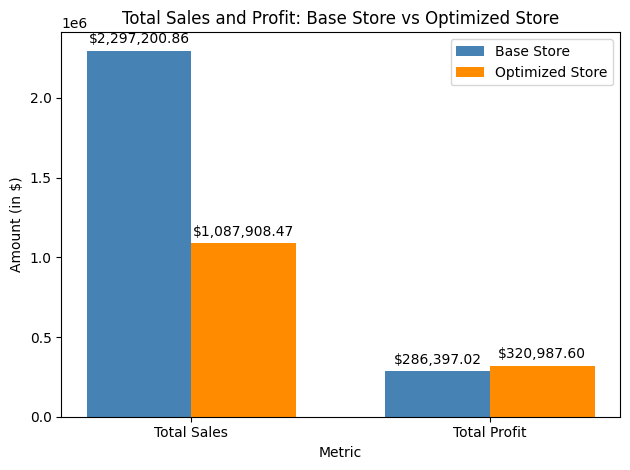

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the base store and optimized store
labels = ['Total Sales', 'Total Profit']
base_store = [2297200.86, 286397.02]  # Base store sales and profit
optimized_store = [1087908.47, 320987.60]  # Optimized store sales and profit

# Set the width of the bars
bar_width = 0.35
x = np.arange(len(labels))  # Label locations

# Create a grouped bar chart
fig, ax = plt.subplots()
bar1 = ax.bar(x - bar_width/2, base_store, bar_width, label='Base Store', color='steelblue')
bar2 = ax.bar(x + bar_width/2, optimized_store, bar_width, label='Optimized Store', color='darkorange')

# Add labels, title, and axes
ax.set_xlabel('Metric')
ax.set_ylabel('Amount (in $)')
ax.set_title('Total Sales and Profit: Base Store vs Optimized Store')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Display the values on top of the bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'${height:,.2f}',  # Format the number as currency
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset text vertically
                    textcoords="offset points",
                    ha='center', va='bottom')

# Add value labels to each bar
add_labels(bar1)
add_labels(bar2)

# Show the plot
plt.tight_layout()
plt.show()


#### **Conclusion: Focused Differentiation Strategy**

The most appropriate technical term for the approach taken in this analysis is a **"Focused Differentiation Strategy"**. This strategy allows the new subsidiary store to differentiate itself by focusing on a carefully selected, high-margin product mix, designed to maximize profitability rather than maximizing overall sales volume. The results of the analysis provide strong support for the success of this approach, using various techniques to derive insights from the dataset.

#### Key Supporting Statistics:
- **Total Sales**: 
   - The total sales for the base store were **$2,297,200.86**, while the optimized product mix generated **$1,087,908.47**. 
   - Despite the **52.6% reduction in total sales**, the focus on high-margin items still led to a more profitable outcome.
  
- **Total Profit**: 
   - The total profit for the base store was **$286,397.02**, compared to the optimized store's **$320,987.60**. 
   - This represents a **12.1% increase in profit** in the optimized store, achieved by eliminating low or negative-profit products and focusing on profitable, non-discounted items.

- **Profit Margin**: 
   - The overall profit margin for the base store was **12.47%**, while the profit margin for the optimized store was **199.00%**.
   - This **dramatic improvement in profitability** underscores the effectiveness of the focused differentiation strategy, which concentrates on high-margin products to drive profit, even at lower sales volumes.

---

#### Techniques Employed:

To achieve this focused differentiation, I applied several key techniques to thoroughly analyze and tease out insights from the dataset:

1. **Initial Data Inspection and Cleaning**:
   - I began by conducting an **initial data inspection**, identifying missing values, ensuring appropriate data types (e.g., converting date columns to datetime), and checking for inconsistencies.
   - This cleaning process set the foundation for accurate analysis by ensuring the integrity of the dataset.

2. **Grouping and Aggregation**:
   - By **grouping products** based on their names and calculating their **average sales** and **average profit margins**, I was able to categorize products by their financial performance.
   - This allowed me to identify top-selling and most profitable products, which provided insight into which items could be prioritized for the new store.

3. **Profit Margin Calculation**:
   - A crucial step was calculating the **profit margin** for each product using the formula:
     \[
     \text{Profit Margin} = \left( \frac{\text{Profit}}{\text{Sales}} \right) \times 100
     \]
   - This metric provided a clear view of how efficiently each product converted sales into profit, guiding decisions on which products to include in the optimized product mix.

4. **Correlation Analysis**:
   - To explore the relationship between **discounts** and **profit margins**, I calculated the **correlation coefficient** between these two variables. 
   - The negative correlation of **-0.8645** revealed that higher discounts tend to reduce profit margins, helping us make the strategic decision to focus on non-discounted items.

5. **Analysis of High-Discount Products**:
   - I identified and analyzed the **top products by discount percentage** to assess their sales and profit margins. The analysis showed that while high discounts boosted sales, they significantly hurt profitability, reinforcing our focus on non-discounted items.

6. **Elimination of Low-Profit Items**:
   - Products with **negative profit margins** were filtered out from the dataset, as they were contributing to overall losses. This step was critical in shaping the new store's optimized product mix, ensuring that only profitable items remained.

7. **Optimized Product Mix**:
   - After filtering and cleaning, we established the **optimized product mix** by focusing on high-margin, non-discounted products. This mix provided a significant increase in profitability with reduced sales volume, reflecting the value of a targeted strategy.
  
8. **Benchmarking and Comparison**:
   - By comparing the **total sales**, **total profit**, and **profit margin** of the base store and the optimized product mix, we were able to benchmark the performance of the new strategy. This comparison showed the substantial gains in profitability despite the reduced sales.

---

#### **Conclusion:**

By employing these techniques, I uncovered the financial realities within the dataset, allowing us to make informed decisions about the product mix for the new subsidiary store. The **Focused Differentiation Strategy**—which centers on eliminating low-margin products, focusing on high-margin non-discounted items, and leveraging profitability over sales volume—proved to be a highly effective approach.

The result is a store model that prioritizes **profitability over revenue growth**, yielding a much higher **profit margin** and **total profit**, even with a smaller selection of products. This optimized approach not only enhances the store's financial performance but also offers a sustainable long-term strategy for growth. Other overhead and marketing  realities were not considered in this data engineering project but would certainly be necessary in further business exploration study efforts. 
